In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images and Haarcascade Classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip

!unzip -qq images.zip
!unzip -qq haarcascades.zip

--2023-05-20 06:50:00--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.26
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  19.7MB/s    in 1.4s    

2023-05-20 06:50:02 (19.7 MB/s) - ‘images.zip’ saved [29586716/29586716]

--2023-05-20 06:50:02--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.26
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.26|:443... connected.
HTTP r

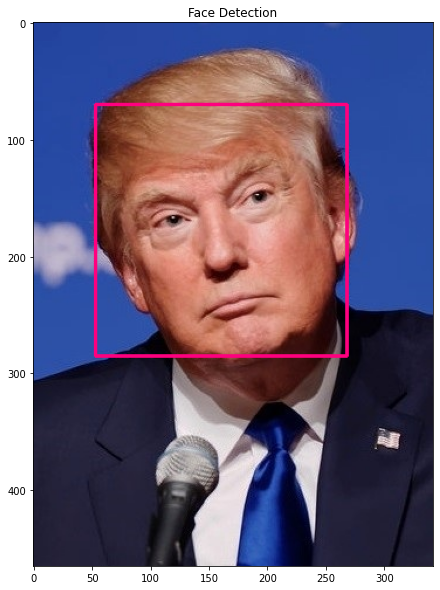

In [ ]:
face_classifier = cv2.CascadeClassifier('/content/Haarcascades/haarcascade_frontalface_default.xml')

image = cv2.imread('/content/images/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)

if faces is ():
  print("No faces found")

for (x,y,w,h) in faces:
  cv2.rectangle(image, (x,y), (x+w, y+h), (127,0,255), 2)

imshow('Face Detection', image)

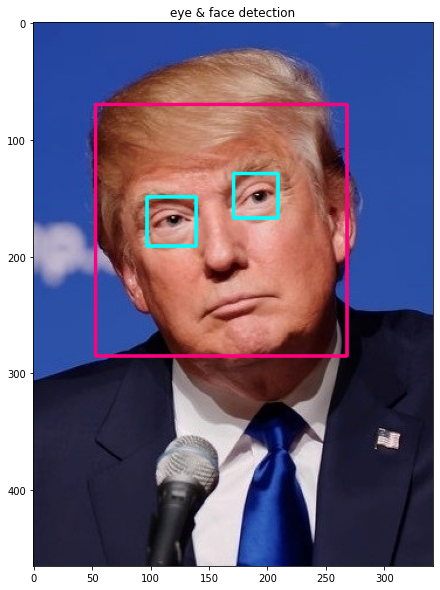

In [ ]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier('/content/Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/Haarcascades/haarcascade_eye.xml')

img = cv2.imread('/content/images/Trump.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray,1.3,5)

if faces is ():
  print("No face found")

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyes = eye_classifier.detectMultiScale(roi_gray, 1.2, 3)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey), (ex+ew,ey+eh),(255,255,0),2)

imshow('eye & face detection', img)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.0):
  js = Javascript('''
    async function takePhoto(quality){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent ='Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
  
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

saved to photo.jpg


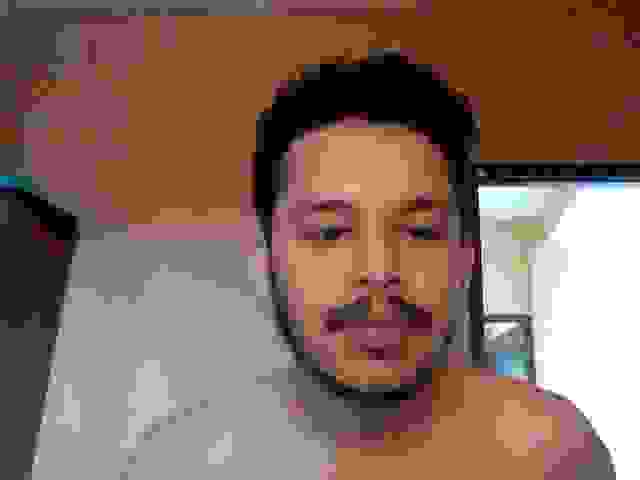

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('saved to {}'.format (filename))
  display(Image(filename))

except Exception as err:
  print(str(err))

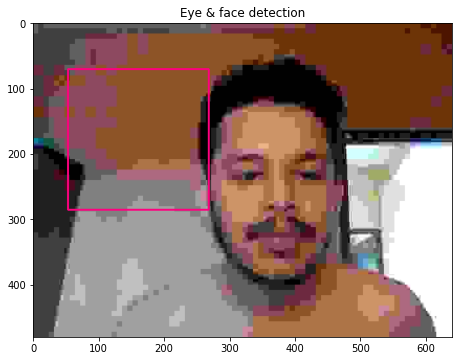

In [ ]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier('/content/Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/Haarcascades/haarcascade_eye.xml')

img = cv2.imread('photo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face = face_classifier.detectMultiScale(gray, 1.3, 5)

if faces is():
  print('No face found')

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyes = eye_classifier.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & face detection', img)

In [ ]:
#This only works on a local machine, will not work in Colab

import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img
    
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            
    roi_color = cv2.flip(roi_color,1)
    return roi_color

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      